# 🚗🔎 **Comparativa de modelos YOLO para detección vehicular**

Este notebook analiza los resultados experimentales de 11 modelos YOLO (v8, v9, v10, v11; variantes n/s/m) con métricas de exactitud, rendimiento y velocidad.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.dpi"] = 110 # Establecer la resolución de la figura 
plt.rcParams["axes.titlesize"] = 9 # Establecer el tamaño del título de los ejes 
plt.rcParams["axes.labelsize"] = 8 # Establecer el tamaño de las etiquetas de los ejes 

In [10]:
# Cargar el archivo CSV con los resultados de los modelos YOLO 
csv_path = r"/home/guardiaserver/bogota/vision-urbana-bogota/results/results_yolos.csv"   # ajusta si lo guardas en otra carpeta
df = pd.read_csv(csv_path)

# Convertir las columnas de tipo string a numérico, ignorando errores 
num_cols = df.columns.drop(["modelo", "pesos"])
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

df.head()

,modelo,pesos,epochs,batch,imgsz,tiempo_train_s,mAP50-95,mAP50,precision,recall,f1,fps,latency_ms
0,yolov9m,yolov9m.pt,120,16,640,569.38,0.847729,0.944965,0.821519,0.914852,NaN,256.521737,3.898305
1,yolov8n,yolov8n.pt,120,16,640,186.63,0.787767,0.923513,0.795404,0.899481,NaN,698.098714,1.432462
2,yolov8m,yolov8m.pt,120,16,640,500.79,0.843924,0.931175,0.823802,0.878882,NaN,296.560989,3.371988
3,yolov8s,yolov8s.pt,120,16,640,262.79,0.822248,0.935434,0.968768,0.770643,NaN,702.151244,1.424195
4,yolov9s,yolov9s.pt,120,16,640,365.54,0.817139,0.930900,0.832159,0.885359,NaN,13.755547,72.697943


In [11]:
# Mostrar estadísticas descriptivas de las columnas numéricas y categóricas
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
modelo,11,11,yolov9m,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pesos,11,11,yolov9m.pt,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
epochs,11.0,NaN,NaN,NaN,120.0,0.0,120.0,120.0,120.0,120.0,120.0
batch,11.0,NaN,NaN,NaN,16.0,0.0,16.0,16.0,16.0,16.0,16.0
imgsz,11.0,NaN,NaN,NaN,640.0,0.0,640.0,640.0,640.0,640.0,640.0
tiempo_train_s,11.0,NaN,NaN,NaN,359.8,146.444052,186.63,243.04,320.33,506.32,569.38
mAP50-95,11.0,NaN,NaN,NaN,0.820579,0.027145,0.770323,0.80343,0.825128,0.84528,0.848349
mAP50,11.0,NaN,NaN,NaN,0.932012,0.015321,0.898643,0.922996,0.931175,0.944734,0.952451
precision,11.0,NaN,NaN,NaN,0.857325,0.056642,0.795404,0.822661,0.83262,0.890046,0.968768
recall,11.0,NaN,NaN,NaN,0.865932,0.058867,0.760953,0.840062,0.885359,0.909789,0.914852


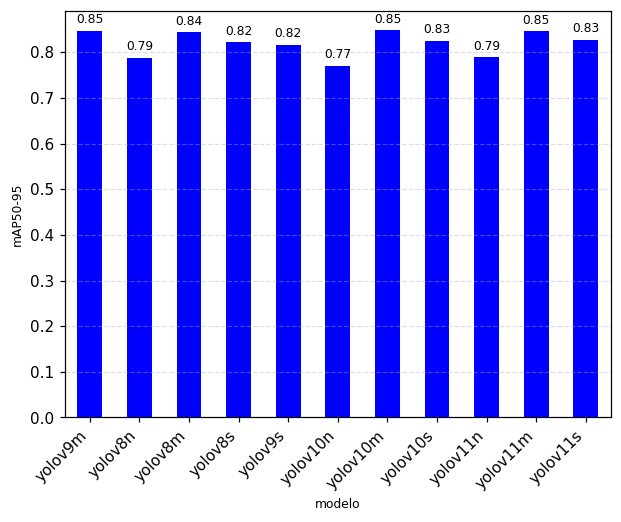

In [13]:
# Graficar el mAP50-95 de cada modelo YOLO 
df.plot.bar(x="modelo", y="mAP50-95", legend=False, color = "blue")
# Mostrar los pesos de cada modelo en el título del gráfico
for i, v in enumerate(df["mAP50-95"]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center", va="bottom", fontsize=8) 
# Configurar el título y las etiquetas del gráfico 
plt.ylabel("mAP50-95"); plt.xticks(rotation=45, ha="right"); plt.grid(axis="y", alpha=0.4, linestyle="--")

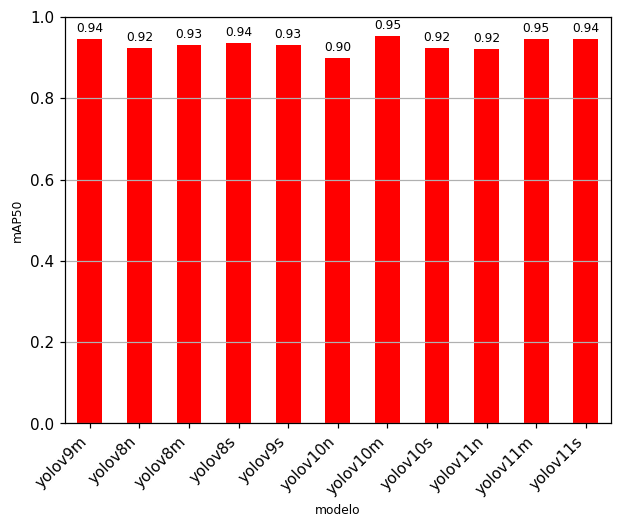

In [16]:
# Graficar el mAP50 de cada modelo YOLO 
df.plot.bar(x="modelo", y="mAP50", color="red", legend=False)
# Mostrar valores de mAP50 encima de las barras
for i, v in enumerate(df["mAP50"]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center", va="bottom", fontsize=8)
plt.ylabel("mAP50"); plt.xticks(rotation=45, ha="right"); plt.grid(axis="y")

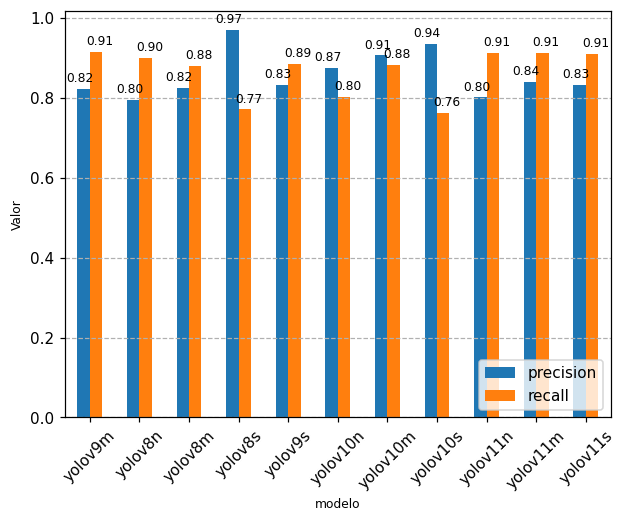

In [21]:
# Graficar la precisión y el recall de cada modelo YOLO 
ax = df.set_index("modelo")[["precision", "recall"]].plot.bar(rot=45)
# Mostrar los valores de precisión y recall encima de las barras
for i, (prec, rec) in enumerate(zip(df["precision"], df["recall"])):
    ax.text(i - 0.2, prec + 0.01, f"{prec:.2f}", ha="center", va="bottom", fontsize=8, color="black")
    ax.text(i + 0.2, rec + 0.01, f"{rec:.2f}", ha="center", va="bottom", fontsize=8, color="black")
ax.set_ylabel("Valor"); ax.grid(axis="y", linestyle="--")
plt.legend(loc="lower right")
plt.show()

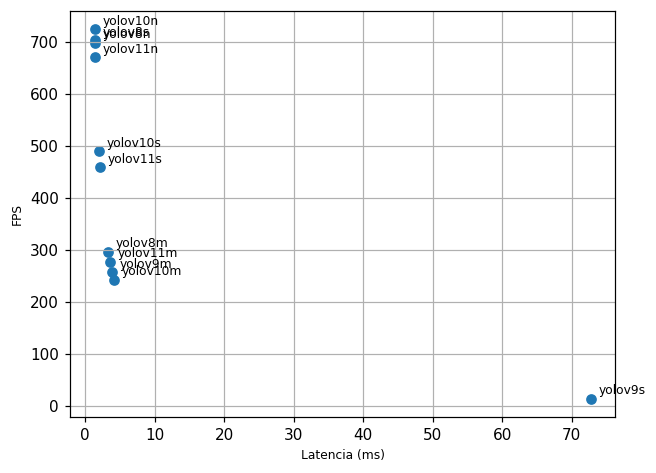

In [23]:
# Graficar la latencia y FPS de cada modelo YOLO 
fig, ax = plt.subplots()
# Graficar los puntos de latencia y FPS 
ax.scatter(df["latency_ms"], df["fps"])
for i, txt in enumerate(df["modelo"]):
    # Anotar cada punto con el nombre del modelo 
    ax.annotate(txt, (df["latency_ms"][i], df["fps"][i]),
                textcoords="offset points", xytext=(5,3), fontsize=8)
ax.set_xlabel("Latencia (ms)")
ax.set_ylabel("FPS")
plt.grid(True)

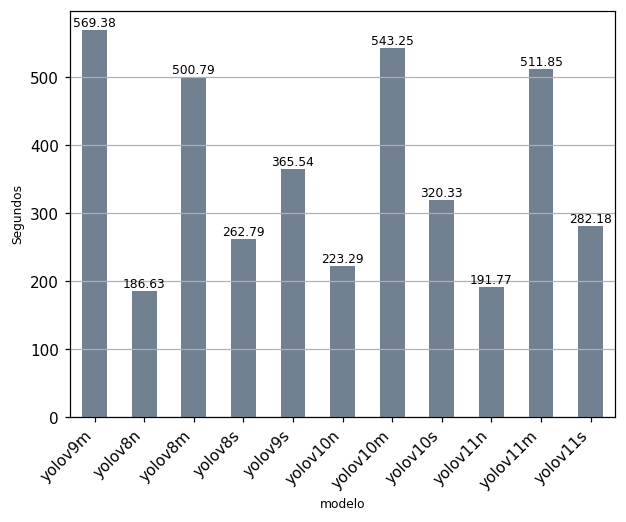

In [24]:
# Graficar el tiempo de entrenamiento de cada modelo YOLO 
df.plot.bar(x="modelo", y="tiempo_train_s", color="slategray", legend=False)
# Mostrar los valores de tiempo de entrenamiento encima de las barras
for i, v in enumerate(df["tiempo_train_s"]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center", va="bottom", fontsize=8)
plt.ylabel("Segundos"); plt.xticks(rotation=45, ha="right"); plt.grid(axis="y")

In [27]:
# Calcular un score total ponderado para cada modelo YOLO 
weights = {
    "mAP50-95": 0.30, "mAP50": 0.25, # ponderación de mAP50-95 y mAP50 
    "precision": 0.15, "recall": 0.15, # ponderación de precisión y recall 
    "fps": 0.10, "latency_ms": -0.05  # ponderación de FPS y latencia (negativa)
}
# Normalizar las columnas y calcular el score ponderado 
scores = pd.DataFrame()
for col, w in weights.items():
    # Normalizar la columna y aplicar el peso correspondiente 
    norm = (df[col] - df[col].mean()) / df[col].std()
    scores[col] = norm * w
# Asegurarse de que la latencia sea positiva para el score 
df["score_total"] = scores.sum(axis=1)
df_ranked = df.sort_values("score_total", ascending=False).reset_index(drop=True)
df_ranked[["modelo", "score_total"] + list(weights.keys())]

,modelo,score_total,mAP50-95,mAP50,precision,recall,fps,latency_ms
0,yolov10m,0.737023,0.848349,0.952451,0.905827,0.881223,242.595320,4.122091
1,yolov11m,0.543146,0.846636,0.946431,0.840327,0.913043,277.183294,3.607721
2,yolov9m,0.476773,0.847729,0.944965,0.821519,0.914852,256.521737,3.898305
3,yolov11s,0.345757,0.827402,0.944502,0.832620,0.908385,458.089448,2.182980
4,yolov8s,0.254139,0.822248,0.935434,0.968768,0.770643,702.151244,1.424195
5,yolov8m,0.142059,0.843924,0.931175,0.823802,0.878882,296.560989,3.371988
6,yolov10s,-0.129427,0.825128,0.922479,0.935121,0.760953,489.740863,2.041896
7,yolov9s,-0.401509,0.817139,0.930900,0.832159,0.885359,13.755547,72.697943
8,yolov11n,-0.430825,0.789721,0.921642,0.800766,0.911193,669.848000,1.492876
9,yolov8n,-0.453983,0.787767,0.923513,0.795404,0.899481,698.098714,1.432462


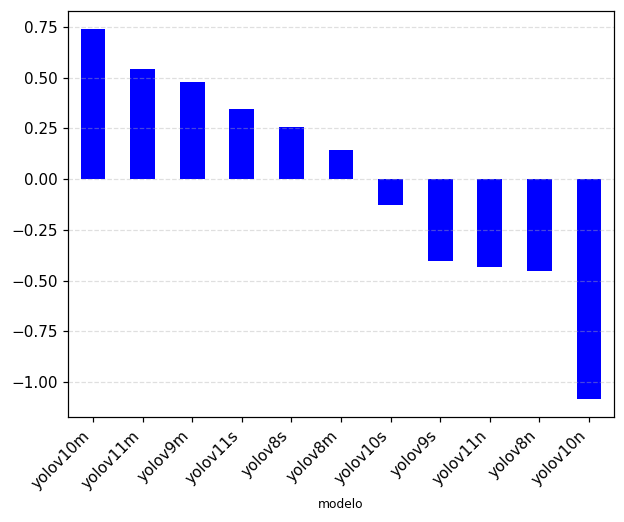

In [ ]:
# Graficar el score total ponderado de cada modelo YOLO 
df_ranked.plot.bar(x="modelo", y="score_total", color="blue", legend=False)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.4)